## Here, we will write code to form the Filled fermi sea state


In [2]:
# Let u first understand how to writ coefficiens of a superposition state

from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_bloch_multivector

state_backend = qiskit_aer.StatevectorSimulator()

def initrstate(qc, label=""):
   state = random_statevector((2,1)).data
   print(state) # if you want to see what state you have initialized the qubit to
   init = Initialize(state)
   init.label = label
   return init

def viewstate(qc):
   result = execute(qc, state_backend).result()
   fstate = result.get_statevector()
   print(fstate) # This will be the superposition state
   return fstate

qc = QuantumCircuit(2)
init1 = initrstate(qc)
init2 = initrstate(qc)
qc.append(init1, [0])
qc.append(init2, [1])

plot_bloch_multivector(viewstate(qc)) #Plot the state vectors on the bloch sphere


[ 0.43421011+0.41520328j -0.01982273-0.79917137j]
[0.50427628-0.41218466j 0.75418697-0.08373325j]


NameError: name 'execute' is not defined

In [52]:
# Let us first create the array for k values to be used
import numpy as np


def array_k(num_qubits):  #assuming num_qubits is even
    array_k = []
    m = num_qubits/2
    if (m)%2!=0: #replace with m-1 for previous results
        for j in range(-int((m)//2),int((m)//2) + 1): #replace with m-1 for previous results
            array_k.append(2*np.pi*j/num_qubits)
    else:
        for j in range(-int((m)//2),int((m)//2)):
            array_k.append(2*np.pi*j/num_qubits)
    return array_k

print(array_k(8))


        



[-1.5707963267948966, -0.7853981633974483, 0.0, 0.7853981633974483]


In [29]:
num_qubits = 6

In [30]:
# Now we have an array, let us make the matrix on which we are going to store the proper k values

coeff_array = []
array_k = array_k(num_qubits)
for k in array_k:
    pos_list = []
    for x in range(num_qubits):
        pos_list.append(np.exp(-1j*k*x))
    coeff_array.append(pos_list)

coeff_array = np.array(coeff_array)
print(coeff_array)


[[ 1. +0.00000000e+00j  0.5+8.66025404e-01j -0.5+8.66025404e-01j
  -1. +1.22464680e-16j -0.5-8.66025404e-01j  0.5-8.66025404e-01j]
 [ 1. +0.00000000e+00j  1. +0.00000000e+00j  1. +0.00000000e+00j
   1. +0.00000000e+00j  1. +0.00000000e+00j  1. +0.00000000e+00j]
 [ 1. +0.00000000e+00j  0.5-8.66025404e-01j -0.5-8.66025404e-01j
  -1. -1.22464680e-16j -0.5+8.66025404e-01j  0.5+8.66025404e-01j]]


In [31]:
'0'<'5' #checking how sorting works in character strings

True

In [32]:
def sort_bitstr(bitstr):
    bit_array = []
    for i in bitstr:
        bit_array.append(i)
    #print(bit_array)
    bitstr_sorted = ''
    for i in range(len(bit_array)):
        bit_array[i] = int(bit_array[i])
    bit_array.sort()
    #print(bit_array)
    for i in bit_array:
        #print(i,str(i))
        bitstr_sorted += str(i)
        #print(bitstr_sorted)

    return bitstr_sorted

print(sort_bitstr('02317'))

01237


In [33]:
def hammingDist(str1, str2): 
    i = 0
    count = 0
  
    while(i < len(str1)): 
        if(str1[i] != str2[i]): 
            count += 1
        i += 1
    return count 

def perm_str(bitstr,bitstr_sorted):
    c = hammingDist(bitstr,bitstr_sorted)
    if c%2 == 0:
        if int(c/2)%2 == 0:
            return 1
        else:
            return -1
    else:
        if int(c/2)%2 == 0:
            return -1
        else:
            return 1
    
bitstr = '053214'
bitstr_sorted = sort_bitstr(bitstr)

print(perm_str(bitstr,bitstr_sorted))

-1


In [35]:
# Now we have the coefficient array, let us use recursive calls to form the dict

m = int(num_qubits/2) # taking always even number of qubits
l = 0  
coeff_dict = {}
def recursive_nested(l,coeff = 1,bitstr=''):
    if l==m-1: # m-1, but we start with 0 indexing
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                coeff = coeff*coeff_array[l,i]
                bitstr = bitstr + f'{i}'
                bitstr_sorted = sort_bitstr(bitstr) #to sort the string first
                perm = perm_str(bitstr,bitstr_sorted) # to compare hamming distance
                if bitstr_sorted in coeff_dict.keys():
                    coeff_dict[bitstr_sorted]+=coeff*perm
                else:
                    coeff_dict[bitstr_sorted] = coeff*perm
            bitstr = bitstr_copy
            coeff = coeff_copy
    if l!=m-1:
        coeff_copy = coeff  #to ensure multiplied coeffs in previous rounds is preserved and reused
        bitstr_copy = bitstr
        for i in range(num_qubits):
            if str(i) in bitstr:
                pass
            else:
                #print(coeff)
                coeff = coeff*coeff_array[l,i]
                bitstr += str(i)
                recursive_nested(l+1,coeff,bitstr)
            bitstr = bitstr_copy
            coeff = coeff_copy
            


recursive_nested(l)
print(coeff_dict)

{'012': (-1.1102230246251565e-16+1.7320508075688772j), '013': (1.1102230246251565e-16+3.464101615137755j), '014': (1.1102230246251565e-16+3.464101615137755j), '015': 1.7320508075688785j, '023': (1.1102230246251565e-16+3.4641016151377544j), '024': 5.196152422706632j, '025': 3.464101615137756j, '034': (-1.1102230246251565e-16+3.464101615137754j), '035': (-1.1102230246251565e-16+3.464101615137756j), '045': 1.7320508075688785j, '123': (-1.1102230246251565e-16+1.7320508075688772j), '124': 3.464101615137754j, '125': 3.464101615137755j, '134': 3.4641016151377535j, '135': 5.196152422706632j, '145': 3.464101615137755j, '234': 1.7320508075688763j, '235': 3.464101615137754j, '245': (2.220446049250313e-16+3.464101615137754j), '345': 1.7320508075688763j}


In [36]:
#Now that we have got the dictionary of phases, we make a complex vector

coeff_list = [0]*num_qubits
for bstr in coeff_dict.keys():
    for k in range(m-1):
        coeff_list[int(bstr[k])]+= coeff_dict[bstr]

print(coeff_list)

[31.1769145362398j, 31.17691453623979j, (2.220446049250313e-16+29.44486372867091j), (-2.220446049250313e-16+22.5166604983954j), (2.220446049250313e-16+10.392304845413264j), 0]


In [37]:
# let us see if statevector initialization ensures normalization
import qiskit
from qiskit.quantum_info import Statevector


In [38]:
data = np.array([1,1]).reshape(1,2)
print(data)
sv = Statevector([1,1])
sv.data

[[1 1]]


array([1.+0.j, 1.+0.j])

In [45]:
#let us normalize our vector

phase_array = np.array(coeff_list)
phase_array = phase_array/np.linalg.norm(phase_array)

# to use state vector formalism, we need to initialize bitstrings
bitstr_dict = {}
for bstr in coeff_dict.keys():
    vac_str = ''
    num_list = []
    for k in range(m):
        num_list.append(int(bstr[k]))

    for i in range(num_qubits):
        if i in num_list:
            vac_str += '1'
        else:
            vac_str += '0'
    bitstr_dict[vac_str] = coeff_dict[bstr]

print(bitstr_dict)





{'111000': (-1.1102230246251565e-16+1.7320508075688772j), '110100': (1.1102230246251565e-16+3.464101615137755j), '110010': (1.1102230246251565e-16+3.464101615137755j), '110001': 1.7320508075688785j, '101100': (1.1102230246251565e-16+3.4641016151377544j), '101010': 5.196152422706632j, '101001': 3.464101615137756j, '100110': (-1.1102230246251565e-16+3.464101615137754j), '100101': (-1.1102230246251565e-16+3.464101615137756j), '100011': 1.7320508075688785j, '011100': (-1.1102230246251565e-16+1.7320508075688772j), '011010': 3.464101615137754j, '011001': 3.464101615137755j, '010110': 3.4641016151377535j, '010101': 5.196152422706632j, '010011': 3.464101615137755j, '001110': 1.7320508075688763j, '001101': 3.464101615137754j, '001011': (2.220446049250313e-16+3.464101615137754j), '000111': 1.7320508075688763j}


In [53]:
fermi_state = Statevector([0]*(2**num_qubits))

for bstr in bitstr_dict.keys():
    fermi_state += Statevector.from_label(bstr)*bitstr_dict[bstr]

val_array = []
for i in bitstr_dict.values():
    val_array.append(i)
val_array = np.array(val_array)
#print(val_array)
print(np.linalg.norm(val_array))
fermi_state = fermi_state/np.linalg.norm(val_array)
print(fermi_state)
fermi_state.is_valid()

14.696938456699069
Statevector([ 0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.11785113j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  1.51082217e-17+0.23570226j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.23570226j,
              0.00000000e+00+0.11785113j,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.23570226j,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.35355339j,
              0.00000000e+00+0.23570226j,  0.00000000e+00+0.j        ,
              0.00000000e+00+0.j        ,  0.00000000e+00+0.23570226j,
              0.00000000e+00+0.23570226j,  0.00000000e+00+

True

In [41]:
from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info.states.random import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_bloch_multivector

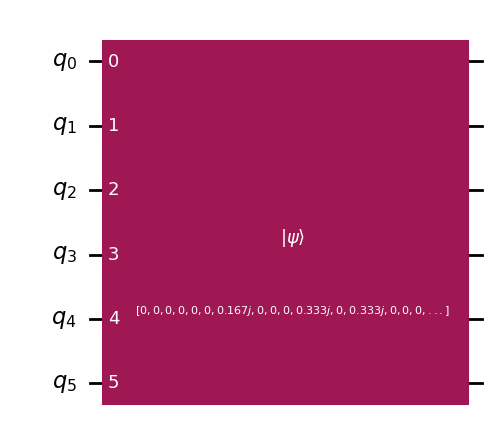

In [42]:
qc = QuantumCircuit(num_qubits)
qc.initialize(fermi_state)

qc.draw(output = 'mpl')

In [47]:
# Let us compare fidelities with other states
from qiskit.quantum_info import state_fidelity

#Creating the other states
sv_boundary = Statevector.from_label('000111')
sv_ghz = (Statevector.from_label('++++++') + Statevector.from_label('------'))/np.sqrt(2)

print(sv_ghz.is_valid())

print('Overlap of Fermi Sea state with boundary wall:',state_fidelity(sv_boundary,fermi_state))
print('Overlap of Fermi Sea state with ghz state:',state_fidelity(sv_ghz,fermi_state))

True
Overlap of Fermi Sea state with boundary wall: 0.013888888888888873
Overlap of Fermi Sea state with ghz state: 0.0


In [48]:
sv_3 = (Statevector.from_label('010101') + Statevector.from_label('101010'))/np.sqrt(2)
print('Overlap of Fermi Sea state with sv_3:',state_fidelity(sv_3,fermi_state))

Overlap of Fermi Sea state with sv_3: 0.25


## Fermi sea tests